In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import os
import re

In [2]:
def df_and_graph(file_name):
    df = pkl.load(open(f"{file_name}/test_set_results.pkl", 'rb'))
    df
    
    test_rows = df.loc[df["set"] == "test"]
    training_rows = df.loc[df["set"] == "training"]

    fig, ax = plt.subplots()

    training_rows.plot.scatter("tddft_energy", "xtb_energy", marker='x', color='red', ax=ax)
    test_rows.plot.scatter("tddft_energy", "xtb_energy", marker='x', color='black', ax=ax)

    fig.set_size_inches(12, 12)
    plt.show()

## Errors and correlations

In [3]:
directories = os.walk(".")
dirs = [i[0] for i in directories]
#dirs = [x for x in dirs if re.match(r'^.\/[a-z]+', x)]
dirs

['.',
 './huckel_electronegativity_global_pair_response',
 './huckel_electronegativity_response',
 './huckel_electronegativity_kinetic_response',
 './response',
 './huckel_kinetic',
 './global_pair_response',
 './huckel_global_pair',
 './kinetic_global_pair',
 './huckel_global_pair_response',
 './electronegativity_global_pair_response',
 './huckel',
 './electronegativity_global_pair',
 './huckel_electronegativity_kinetic',
 './electronegativity_kinetic_global_pair_response',
 './huckel_electronegativity_kinetic_global_pair_response',
 './global_pair',
 './kinetic_response',
 './huckel_kinetic_global_pair_response',
 './huckel_electronegativity_global_pair',
 './kinetic',
 './.ipynb_checkpoints',
 './huckel_kinetic_global_pair',
 './huckel_electronegativity',
 './huckel_kinetic_response',
 './huckel_electronegativity_kinetic_global_pair',
 './electronegativity_kinetic_response',
 './electronegativity_kinetic_global_pair',
 './huckel_response',
 './kinetic_global_pair_response',
 './elec

In [12]:
directories = os.walk(".")

files = [i[2] for i in directories]

rerun_pile = []
output_files = []
test_result_files = []


for enum, f in enumerate(files):
    if re.search(r'^./[a-z]+', dirs[enum]) is None:
        continue
    output_file = [x for x in f if re.search(r'\d+$', x) is not None]
    df_file = [x for x in f if re.search(r'test_set_results.pkl', x) is not None]
    
    if(len(df_file) == 0):
        print(f"no test results file for {dirs[enum]}")
        rerun_pile.append(dirs[enum])
        continue
    
    output_files.append(dirs[enum] +"/" + output_file[0])
    test_result_files.append(df_file[0])

no test results file for ./huckel_electronegativity_kinetic_response
no test results file for ./response
no test results file for ./huckel_global_pair_response
no test results file for ./huckel_kinetic_response
no test results file for ./electronegativity_kinetic_response
no test results file for ./huckel_response


In [20]:
for file in output_files:
    lines = list(open(file).readlines())
    
    print(lines[-6])

RMSE(energy) : 0.059 R^2(energy) : 0.204 R^2(dipole_mags) : 0.204

RMSE(energy) : 0.024 R^2(energy) : 0.664 R^2(dipole_mags) : 0.206

RMSE(energy) : 0.102 R^2(energy) : 0.231 R^2(dipole_mags) : 0.129

RMSE(energy) : 0.054 R^2(energy) : 0.216 R^2(dipole_mags) : 0.201

RMSE(energy) : 0.108 R^2(energy) : 0.188 R^2(dipole_mags) : 0.168

RMSE(energy) : 0.115 R^2(energy) : 0.163 R^2(dipole_mags) : 0.162

RMSE(energy) : 0.044 R^2(energy) : 0.323 R^2(dipole_mags) : 0.214

RMSE(energy) : 0.119 R^2(energy) : 0.100 R^2(dipole_mags) : 0.202

RMSE(energy) : 0.134 R^2(energy) : 0.177 R^2(dipole_mags) : 0.163

RMSE(energy) : 0.093 R^2(energy) : 0.225 R^2(dipole_mags) : 0.177

RMSE(energy) : 0.044 R^2(energy) : 0.289 R^2(dipole_mags) : 0.213

RMSE(energy) : 0.065 R^2(energy) : 0.178 R^2(dipole_mags) : 0.203

RMSE(energy) : 0.113 R^2(energy) : 0.164 R^2(dipole_mags) : 0.165

RMSE(energy) : 0.048 R^2(energy) : 0.393 R^2(dipole_mags) : 0.205

RMSE(energy) : 0.048 R^2(energy) : 0.327 R^2(dipole_mags) : 0.

In [9]:
df_and_graph("huckel_electronegativity_kinetic_response")

FileNotFoundError: [Errno 2] No such file or directory: 'huckel_electronegativity_kinetic_response/test_set_results.pkl'

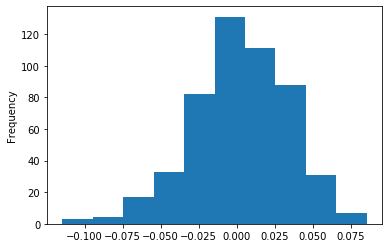

In [26]:
df["energy_error"].plot(kind='hist')